In [307]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score


In [296]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [297]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [298]:
my_data.shape

(200, 6)

In [299]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [300]:
y = my_data['Drug']

# Setting up the Decision Tree

In [302]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [303]:
X_train.shape, y_train.shape

((140, 5), (140,))

In [304]:
X_train = pd.DataFrame(X_train, columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

In [305]:
X_train;

In [306]:
X_test = pd.DataFrame(X_test, columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

In [281]:
imp_constant = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(handle_unknown='ignore')
imp_ohe = make_pipeline(imp_constant, ohe)


# Making a transformer
ct = make_column_transformer(
    (imp_ohe, ['Sex', 'BP', 'Cholesterol']),
    remainder='passthrough')

# Modeling

In [282]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [283]:
# Creating a pipeline
pipe = make_pipeline(ct, drugTree)

In [284]:
# Fit data using the pipeline
pipe.fit(X_train, y_trainset)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [285]:
predTree = pipe.predict(X_test)

In [286]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Evaluation

In [287]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


# Visualization

In [288]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

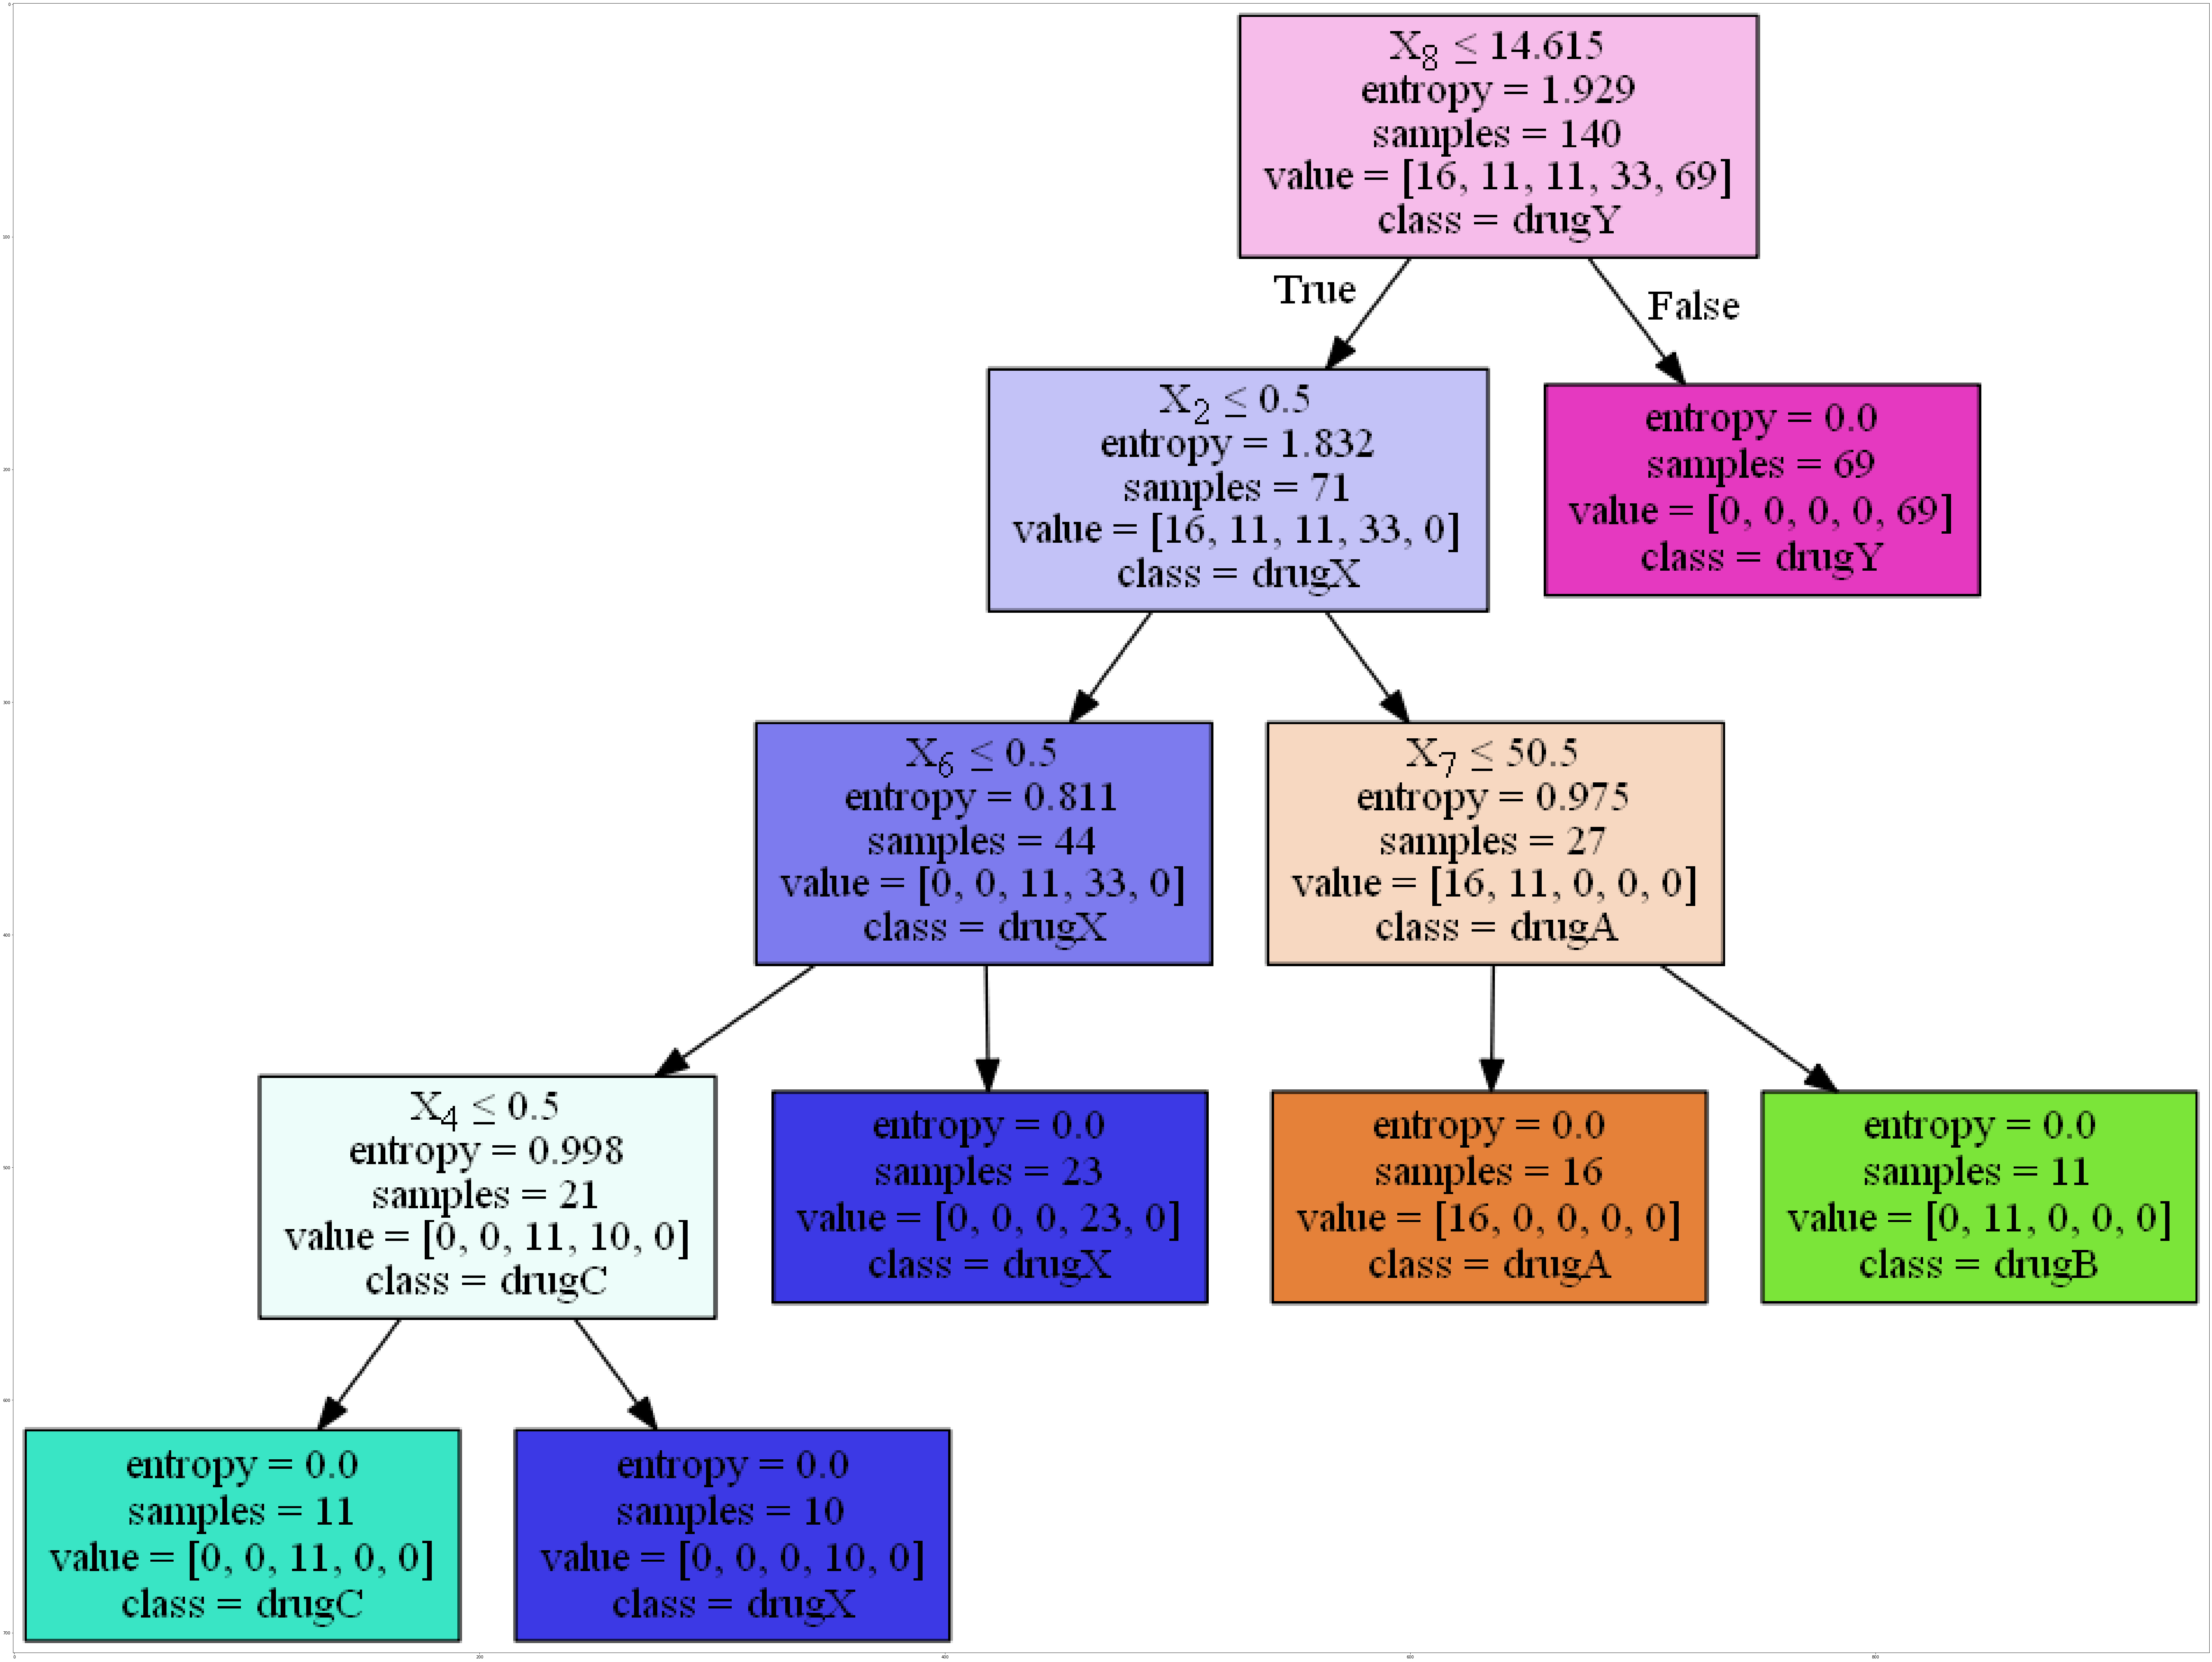

In [293]:
dot_data = StringIO()
filename = "drugtree.png"
out=tree.export_graphviz(drugTree, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')